In [0]:
import matplotlib.image as mpimg
import math
import copy
import time
import cv2
import glob
import random
import torch
import torchvision
import numpy as np 
from torchvision import transforms, datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from skimage import io
import re
import warnings
import os
from torch.utils.data.sampler import SubsetRandomSampler
warnings.filterwarnings('ignore')

# # for auto reloading the Utils functions
# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

In [0]:
# from shutil import rmtree
# rmtree('/content/mixed_colony_images_gt')
# rmtree('/content/mixed_colony_images_nogt')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.fc1 = nn.Linear(115200, 120)
        self.fc3 = nn.Linear(120, 8)
        
    def forward(self, x):
        x = F.relu(self.conv1(x)) 
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = self.fc3(x)
        return x

net = Net()
PATH = './drive/My Drive/Capstone/shallow_net_bacteria64_serial.pth'
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## Object detection on mixed colony data

In [0]:
!unzip './drive/My Drive/Capstone/mixed_colony_images.zip' 

In [0]:
!mkdir 'mixed_colony_images'

In [0]:
!mv './mixed_colony_images_gt' 'mixed_colony_images/'

In [0]:

testing_transforms = transforms.Compose([#transforms.Resize(256),
                                         #transforms.CenterCrop(224),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.5, 0.5, 0.5], 
                                                              [0.5, 0.5, 0.5])])

test_dir='./mixed_colony_images/'
testing_dataset = datasets.ImageFolder(test_dir, transform=testing_transforms)
test_loader = torch.utils.data.DataLoader(testing_dataset, batch_size=1,shuffle=True)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
# functions to show an image
def imshow(img,i):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(i)
    plt.show()

# for i in range(len(testing_dataset)):
#   images=testing_dataset[i][0].unsqueeze(0)
#   imshow(torchvision.utils.make_grid(images),i)

In [0]:

def boundary_filter(img):
  """Return an image without petri dish boundaries 
  """
  pass 


def pos_detector(patch):
  """return True or False"""
  pass 

def get_hot_bboxes(img,net,confidence_thresh,target):
    
    # classifier was trained on 64x64 images
    window = 64
    H, W    = img.shape[2:]
    # get current image region of interest params
    y_start = 0
    x_start = 0
    hot_bboxes = []
    num_boxes  = 0 
    # loop over all possible windows (with the current scale) in the image
    step=window//2
    for x_start in range(0,W-window,step):
        for y_start in range(0,H-window,step):
            num_boxes += 1
            # extract the image patch pixels
            img_patch = img[:,:,y_start:y_start+window,x_start:x_start+window]
            if img_patch.shape != (1,3,64,64):
              continue    
            test_features  = img_patch   
            outputs=net(img_patch)
            test_confidence, test_prediction=torch.max(torch.nn.functional.softmax(outputs),1)
            # check whether there is a car included according to our classifier
            if (test_prediction == target) & (test_confidence > confidence_thresh):
                # if so, append the current box to the hot bounding boxes list
                hot_bboxes.append(((x_start, y_start),
                                   (window+x_start,window+y_start)))
  
    print('Number of boxes :{}'.format(num_boxes))
    print('total of obj is :{}'.format(len(hot_bboxes)))
    return hot_bboxes

# boxes drawing function, usefull for visualizing identified hot boxes
def draw_boxes(img, bboxes, color=(255, 0, 0), thick=6):
    """img is a tensor of shape (batchsize,width,hight,3)
    """
    draw_img = np.copy((img / 2 + 0.5).numpy())
    draw_img=draw_img[0,:,:,:]
    draw_img = np.transpose(draw_img,(1,2,0))
    plt.figure(figsize=(8,8))
    plt.imshow(draw_img)
    plt.show()
    # for bb in bboxes:
    #      cv2.rectangle(draw_img, bb[0], bb[1], color, thick)
    # plt.figure(figsize=(8,8))
    # plt.imshow(draw_img)
    # plt.show()
    return draw_img

In [0]:
 images=testing_dataset[3][0].unsqueeze(0)

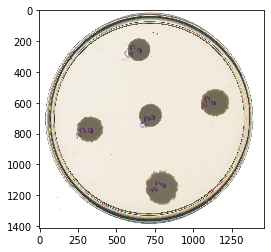

In [17]:
image=io.imread('./mixed_colony_images/mixed_colony_images_gt/Mixed-colony_06_017.jpg')
plt.imshow(image)

Looking for : 0
Number of boxes :1892
total of obj is :44


Looking for : 1
Number of boxes :1892
total of obj is :365


Looking for : 2
Number of boxes :1892
total of obj is :1


Looking for : 3
Number of boxes :1892
total of obj is :17


Looking for : 4
Number of boxes :1892
total of obj is :1


Looking for : 5
Number of boxes :1892
total of obj is :1


Looking for : 6
Number of boxes :1892
total of obj is :0


Looking for : 7
Number of boxes :1892
total of obj is :280




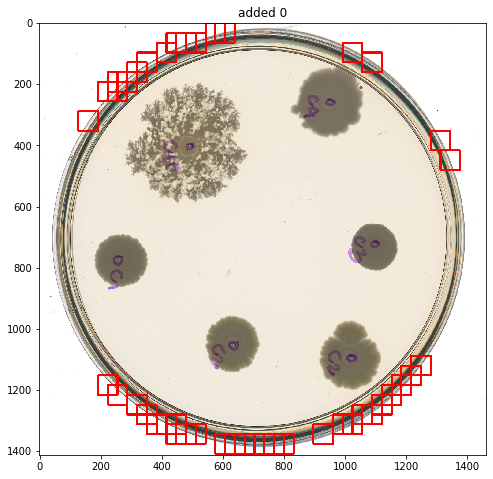

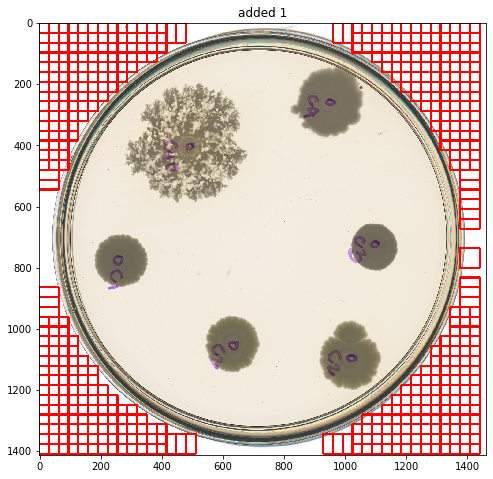

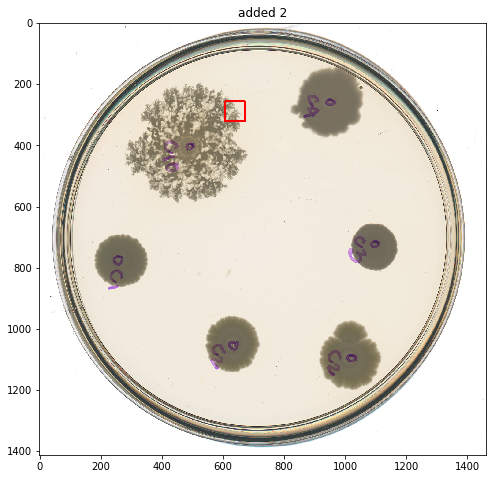

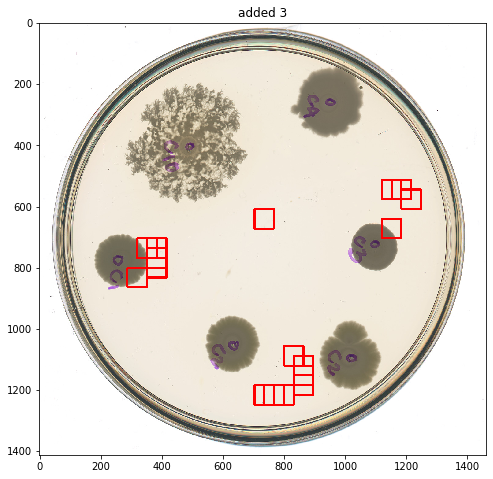

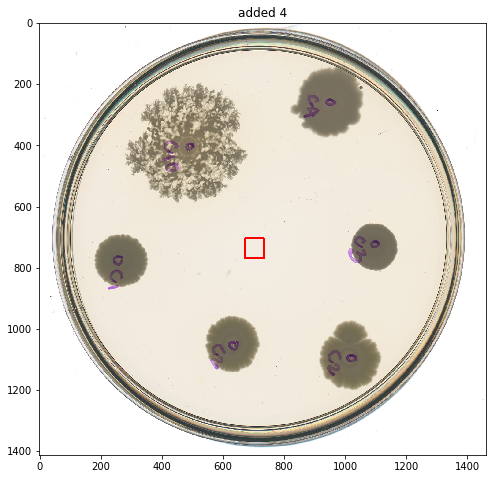

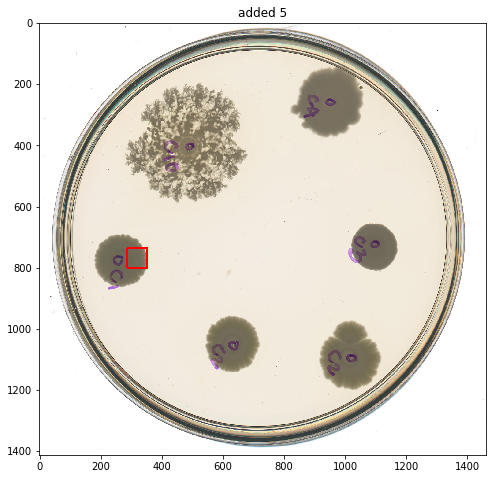

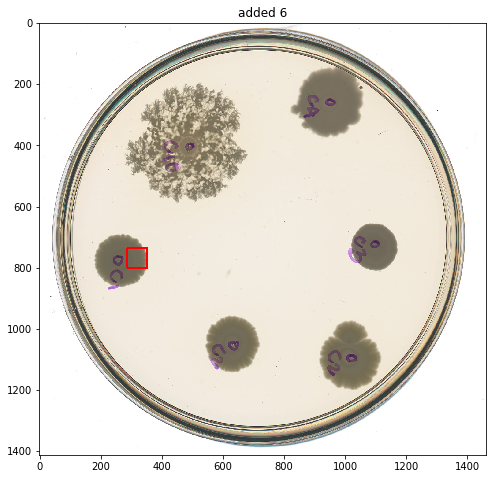

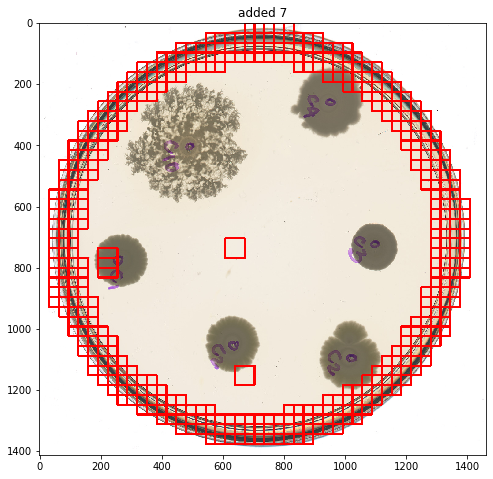

In [34]:
test_img = images
image=io.imread('./mixed_colony_images/mixed_colony_images_gt/Mixed-colony_06_017.jpg')
confidence_thresh = 0.7
for target in [0,1,2,3,4,5,6,7]:
  print("Looking for : {}".format(target))
  boxes=get_hot_bboxes(test_img,net,confidence_thresh,target)
  image=io.imread('./mixed_colony_images/mixed_colony_images_gt/Mixed-colony_06_017.jpg')
  for bb in boxes:
    image2=cv2.rectangle(image,bb[0],bb[1], color=(255,0,0), thickness=6) 
  plt.figure(figsize=(8,8))
  plt.imshow(image2)
  plt.title("added {}".format(target))
  print("\n")

### Adding Heatmap 

In [0]:
def add_heat(heatmap, bbox_list):
    for box in bbox_list:
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    return heatmap

def apply_threshold(heatmap, threshold):
    heatmap[heatmap <= threshold] = 0 
    return heatmap
    
def draw_labeled_heatmap(img, labels):
    # loop over all distinctly detected patches
    for car_number in range(1, labels[1]+1):
        # get pixel indices for current car_number
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        img = cv2.rectangle(img, bbox[0], bbox[1], (255,0,255), 6)
    return img

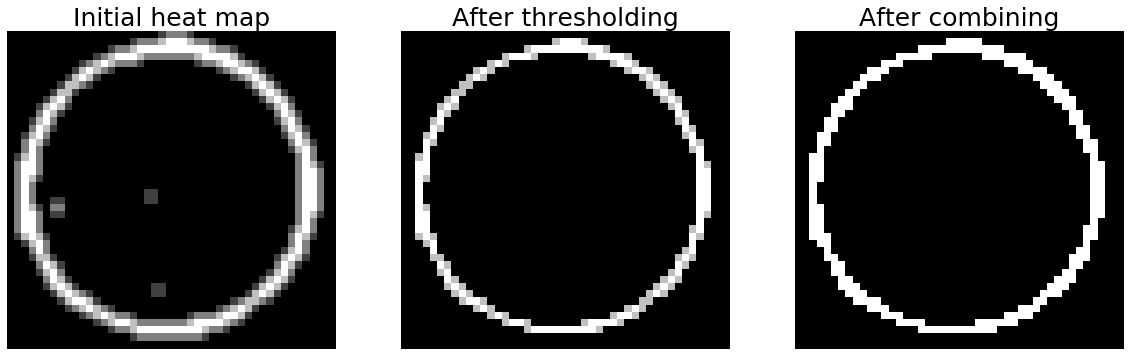

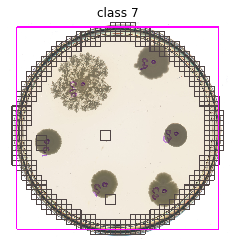

In [33]:
# heat map approach hyperparams
heat_threshold = 2

# intialize heat map
heat = np.zeros_like(image[:,:,0]).astype(np.uint16)
# add all positive box detections to the heat map
heat = add_heat(heat,boxes)
# threshold the heat map
heat_thresh = apply_threshold(np.copy(heat), heat_threshold)
# combine the resulting heat map into continuous patches with identifier, and get number of identifications
labels = label(heat_thresh)
num_car_det = labels[1]
# draw the resulting labels on the original test image
test_img_ann = draw_labeled_heatmap(np.copy(image), labels)

# Visualize the heat map approach
fig, plts = plt.subplots(1, 3, figsize=(20,10))
plts[0].imshow(heat, cmap='gray');      plts[0].axis('off');
plts[0].set_title('Initial heat map', fontsize=25)
plts[1].imshow(heat_thresh, cmap='gray'); plts[1].axis('off');
plts[1].set_title('After thresholding', fontsize=25)
plts[2].imshow(labels[0], cmap='gray'); plts[2].axis('off');
plts[2].set_title('After combining', fontsize=25)
plt.show()

# Visualize the final output
plt.imshow(test_img_ann)
plt.title('class {} '.format(target))
plt.axis('off')
plt.show()